# DATA Collection

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Insight

In [ ]:
import opendatasets as od
import plotly.express as px
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
od.download("https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv") #you can upload the kaggle json files 


Skipping, found downloaded files in "./playground-series-s3e8" (use force=True to force download)


In [ ]:
train_df = pd.read_csv("/content/playground-series-s3e8/train.csv",index_col= "id")
train_df

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.52000,Premium,F,VS2,62.20000,58.00000,7.27000,7.33000,4.55000,13619
1,2.03000,Very Good,J,SI2,62.00000,58.00000,8.06000,8.12000,5.05000,13387
2,0.70000,Ideal,G,VS1,61.20000,57.00000,5.69000,5.73000,3.50000,2772
3,0.32000,Ideal,G,VS1,61.60000,56.00000,4.38000,4.41000,2.71000,666
4,1.70000,Premium,G,VS2,62.60000,59.00000,7.65000,7.61000,4.77000,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31000,Ideal,D,VVS2,61.10000,56.00000,4.35000,4.39000,2.67000,1130
193569,0.70000,Premium,G,VVS2,60.30000,58.00000,5.75000,5.77000,3.47000,2874
193570,0.73000,Very Good,F,SI1,63.10000,57.00000,5.72000,5.75000,3.62000,3036


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 16.2+ MB


In [ ]:
train_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [ ]:
train_df.nunique()

carat       248
cut           5
color         7
clarity       8
depth       153
table       108
x           522
y           521
z           349
price      8738
dtype: int64

In [ ]:
train_df.describe()

,carat,depth,table,x,y,z,price
count,193573.00000,193573.00000,193573.00000,193573.00000,193573.00000,193573.00000,193573.00000
mean,0.79069,61.82057,57.22767,5.71531,5.72009,3.53425,3969.15541
std,0.46269,1.08170,1.91884,1.10942,1.10233,0.68892,4034.37414
min,0.20000,52.10000,49.00000,0.00000,0.00000,0.00000,326.00000
25%,0.40000,61.30000,56.00000,4.70000,4.71000,2.90000,951.00000
50%,0.70000,61.90000,57.00000,5.70000,5.72000,3.53000,2401.00000
75%,1.03000,62.40000,58.00000,6.51000,6.51000,4.03000,5408.00000
max,3.50000,71.60000,79.00000,9.65000,10.01000,31.30000,18818.00000


In [ ]:
C_data =train_df.select_dtypes(include = ["object"]).columns.tolist()
N_data =train_df.select_dtypes(include = ["float64"]).columns.tolist()
T_data = ["price"]

Numberical DATA

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_df[N_data])
scaled_values =scaler.transform(train_df[N_data])
train_df[N_data] = scaled_values
train_df[N_data] 

,carat,depth,table,x,y,z
id,,,,,,
0,0.40000,0.51795,0.30000,0.75337,0.73227,0.14537
1,0.55455,0.50769,0.30000,0.83523,0.81119,0.16134
2,0.15152,0.46667,0.26667,0.58964,0.57243,0.11182
3,0.03636,0.48718,0.23333,0.45389,0.44056,0.08658
4,0.45455,0.53846,0.33333,0.79275,0.76024,0.15240
...,...,...,...,...,...,...
193568,0.03333,0.46154,0.23333,0.45078,0.43856,0.08530
193569,0.15152,0.42051,0.30000,0.59585,0.57642,0.11086
193570,0.16061,0.56410,0.26667,0.59275,0.57443,0.11565


Categorical Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
train_df['cut'] = LE.fit_transform(train_df['cut'])
train_df['clarity'] = LE.fit_transform(train_df['clarity'])

In [ ]:
Final_data = pd.get_dummies(train_df, columns = [ 'color'])
del Final_data['price']
Final_data.info()
 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193573 entries, 0 to 193572
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  int64  
 2   clarity  193573 non-null  int64  
 3   depth    193573 non-null  float64
 4   table    193573 non-null  float64
 5   x        193573 non-null  float64
 6   y        193573 non-null  float64
 7   z        193573 non-null  float64
 8   color_D  193573 non-null  uint8  
 9   color_E  193573 non-null  uint8  
 10  color_F  193573 non-null  uint8  
 11  color_G  193573 non-null  uint8  
 12  color_H  193573 non-null  uint8  
 13  color_I  193573 non-null  uint8  
 14  color_J  193573 non-null  uint8  
dtypes: float64(6), int64(2), uint8(7)
memory usage: 14.6 MB


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Final_data, train_df[T_data], random_state=42, test_size=0.2)

In [ ]:
X_test

,carat,cut,clarity,depth,table,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
id,,,,,,,,,,,,,,,
14868,0.09091,2,2,0.51282,0.26667,0.52332,0.50749,0.10032,1,0,0,0,0,0,0
165613,0.54545,4,3,0.37949,0.26667,0.83731,0.81419,0.15623,0,0,0,1,0,0,0
96727,0.02121,3,6,0.43077,0.33333,0.43420,0.41558,0.08051,0,1,0,0,0,0,0
145593,0.03636,3,6,0.46667,0.33333,0.45907,0.44356,0.08658,0,0,0,0,0,1,0
118689,0.30000,2,2,0.53333,0.23333,0.70155,0.68032,0.13514,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168548,0.24545,1,2,0.58462,0.33333,0.66218,0.63137,0.12907,0,0,0,0,0,1,0
167333,0.03333,2,5,0.47179,0.20000,0.45907,0.44555,0.08690,1,0,0,0,0,0,0
113317,0.21212,4,2,0.52821,0.46667,0.63109,0.61239,0.12173,0,0,1,0,0,0,0


# Models

# DecisionTreeRegressor


In [ ]:
from sklearn.tree import  DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dtc = DecisionTreeRegressor(max_depth = 9,max_leaf_nodes = 18).fit(X_train,y_train)

predictX = dtc.predict(X_train)
predictY = dtc.predict(X_test)
mean_squared_error(y_train, predictX)
mean_squared_error(y_test,predictY)

902210.757293908

In [ ]:
train = []
test = []
xv = []
yv = []

def mod(i,j):
 
    MODEL = DecisionTreeRegressor(max_depth = i,max_leaf_nodes = j).fit(X_train,y_train)
    predictX = MODEL.predict(X_train)
    predictY = MODEL.predict(X_test)
    Tr = mean_squared_error(y_train, predictX)
    Te =mean_squared_error(y_test,predictY)
    train.append(Tr)
    test.append(Te)

for i in range(1,20,2):
   for j in range(2,20,2): 
     xv.append(i)
     yv.append(j)

In [ ]:
for i in range(1,20,2):
   for j in range(2,20,2):  
     mod(i,j)

In [ ]:
model = pd.DataFrame({"train":train,"Test":test,"x":xv,"y":yv})
model.sort_values(by=['Test'], ascending = True).head(10)

,train,Test,x,y
44,891532.26974,902210.75729,9,18
80,891532.26974,902210.75729,17,18
71,891532.26974,902210.75729,15,18
62,891532.26974,902210.75729,13,18
53,891532.26974,902210.75729,11,18
35,891532.26974,902210.75729,7,18
89,891532.26974,902210.75729,19,18
26,933385.78913,951309.33817,5,18
43,950495.38888,967713.50260,9,16
88,950495.38888,967713.50260,19,16


In [ ]:
X_train.columns

Index(['carat', 'cut', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J'],
      dtype='object')

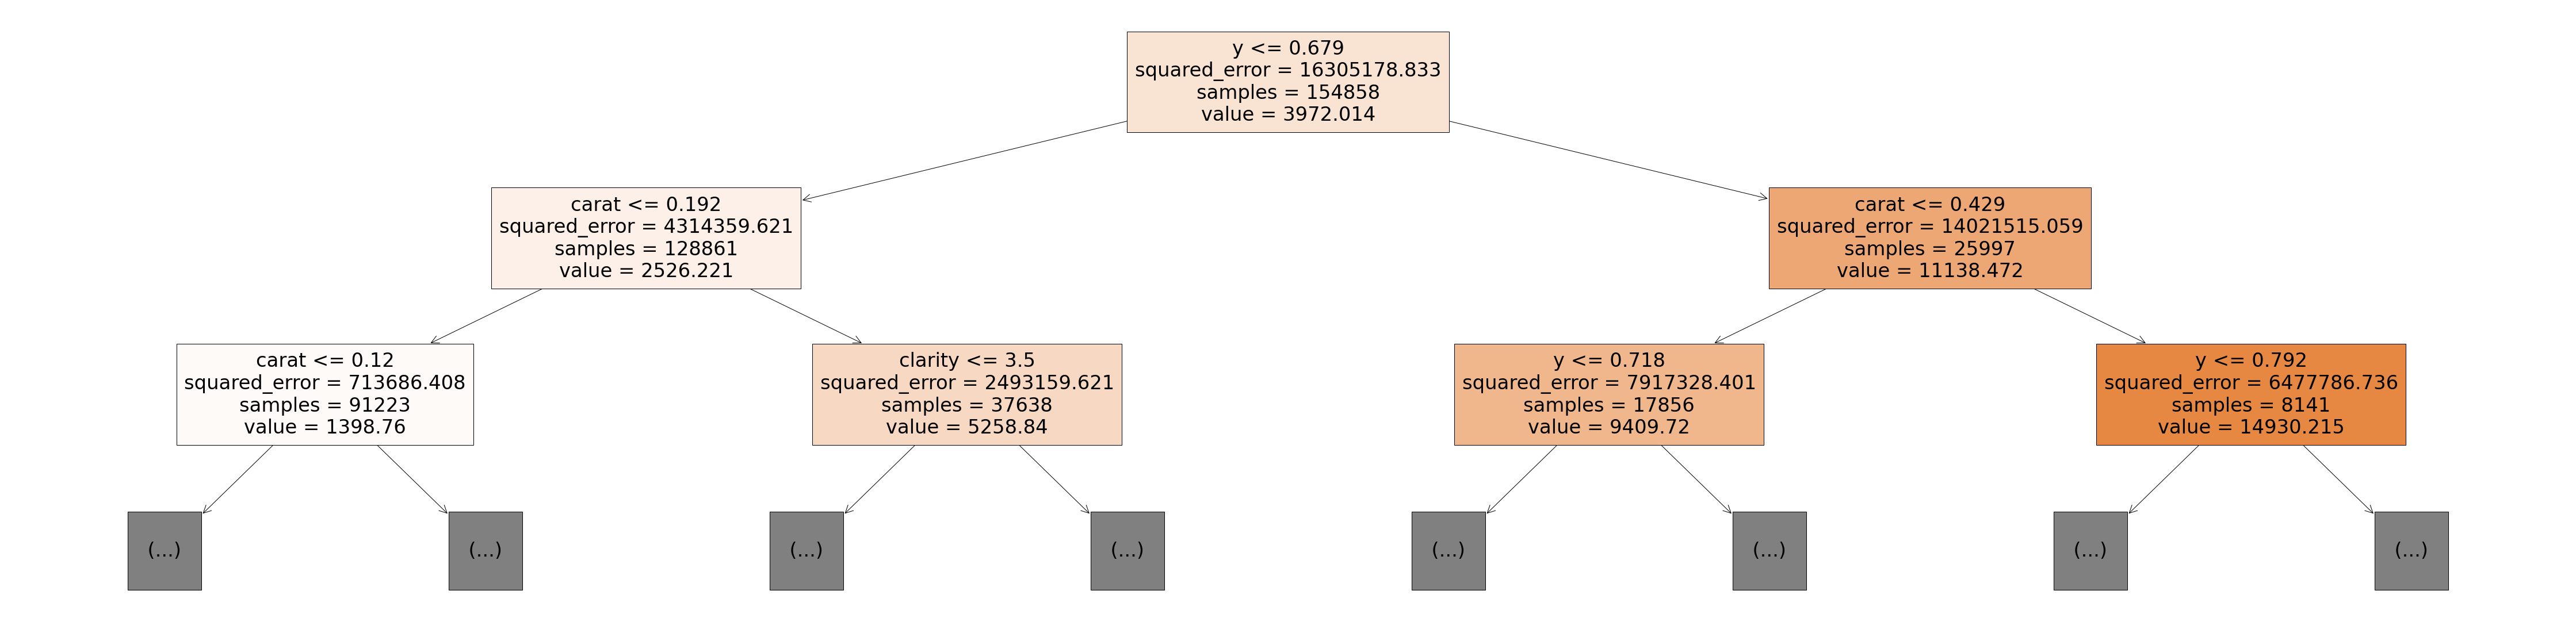

In [ ]:
from sklearn.tree import plot_tree, export_text
import matplotlib.pyplot as plt

plt.figure(figsize=(80,20))
plot_tree(dtc, feature_names=X_train.columns, max_depth=2, filled=True);

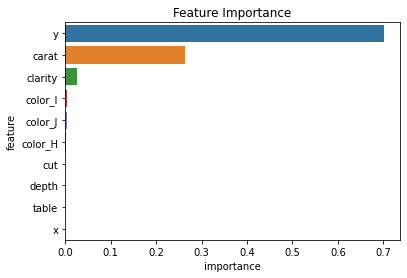

In [ ]:
import seaborn as sns
dtc.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': dtc.feature_importances_
}).sort_values('importance', ascending=False)
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

# Random forest

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression().fit(X_train,y_train)
predictX = lm.predict(X_train)
predictY = lm.predict(X_test)
Tr = mean_squared_error(y_train, predictX)
Te =mean_squared_error(y_test,predictY)
print("Tr:",Tr,"  Te:", Te)

Tr: 1165991.7084443644   Te: 1144959.0607660075


Tr: 1174924.5223702348   Te: 1158003.5223858315


In [85]:
test_df = pd.read_csv("/content/playground-series-s3e8/train.csv",index_col= "id")
C_data =train_df.select_dtypes(include = ["object"]).columns.tolist()
N_data =train_df.select_dtypes(include = ["float64"]).columns.tolist()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_df[N_data])
scaled_values =scaler.transform(train_df[N_data])
train_df[N_data] = scaled_values
train_df[N_data] 
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
train_df['cut'] = LE.fit_transform(train_df['cut'])
train_df['clarity'] = LE.fit_transform(train_df['clarity'])
Final_data = pd.get_dummies(train_df, columns = [ 'color'])
y = Final_data['price']

In [86]:
del Final_data['price']

In [87]:
predictY = dtc.predict(Final_data)
mean_squared_error(y,predictY)

893667.9893181445

In [88]:
sub = pd.read_csv("/content/playground-series-s3e8/sample_submission.csv")

In [89]:
sub["price"] = predictY

ValueError: ignored